In [1]:
from matplotlib import rc
%matplotlib notebook
from lmfit import Model



rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image


In [47]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [30]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [21]:
exp_data_ev, exp_data_response =  np.loadtxt("experimental_data_ptb_calibration.csv", delimiter=",", unpack=True)
fit_data_ev, fit_data_response, fit_data_qe =  np.loadtxt("experimental_data_ptb_calibration_quantum_efficency.csv", delimiter=",", unpack=True)



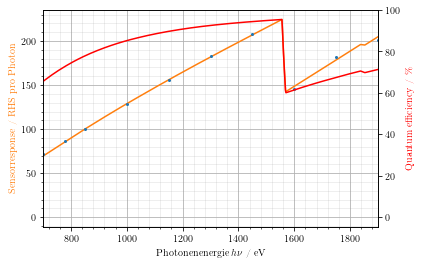

In [53]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((700,1900))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Photonenenergie $h\nu$ / eV')
axes.set_ylabel(r"Sensorresponse / RHS pro Photon", color="C1")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
axes.xaxis.set_major_locator(MultipleLocator(200))
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_major_locator(MultipleLocator(50))
params_string = r"$r$={r:.3e}$\frac{{\mathrm{{ADU}}}}{{\mathrm{{eV}} \cdot \mathrm{{photon}}}}$, $d_{{Si}}$={d_si:.1f}nm, $d_{{Al}}$={d_al:.0f}nm, $d_{{Al_2O_3}}$={d_al2o3:.2f}nm"
#params_string = "$r$=%.3e, $d_{{Si}}$=%.2e, $d_{{Al}}$=%.2e, $d_{{Al_2O_3}}$=%.3e"
#d_{{Si}}, d_{{Al}},d_{{Al_2O_3}}
function_string = "$f(E, r, \{d_m\}) = E\cdot r\cdot\exp[-\Sigma_{m}\mu_m(E)d_m]$ with $m \in \{Al, Si, Al_2O_3\}$"
short_function_string = "$f(E, r, d_{Si}, d_{Al}, d_{Al_2O_3})$"
points = axes.errorbar(exp_data_ev, exp_data_response, fmt='o', ms=2., label='experimental data')
xd = np.linspace(30, 1900, 1300)
#line, = axes.plot(xd, target_func_model.eval(result.params, x=xd), label='best fit using %s\n%s' % (function_string, params_string.format(**result.best_values)))
line2, = axes.plot(fit_data_ev, fit_data_response)

eff_ax = axes.twinx()
eff_ax.set_ylabel('Quantum efficiency / \%', color='red')
eff_line, = eff_ax.plot(fit_data_ev, fit_data_qe*100, color='red', label='f(E)=$\Pi_{m}[T(m,d(m))]$')





In [54]:
fig.savefig('response.pgf')